In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [2]:
df=pd.read_csv('C:\\Users\\sarit\\Downloads\\loan_data.csv')

In [3]:
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [4]:
df.shape

(577, 5)

In [5]:
#to print the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


In [6]:
#to get the summary of the dataset. that is min,max,mean,count values of the dataset
df.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


Here we can see that the ApplicantIncome and LoanAmount are the only two numerical columns in the dataset.

In [8]:
df['ApplicantIncome'].value_counts().sum()

577

In [10]:
df['Loan_Status'].value_counts()

Y    401
N    176
Name: Loan_Status, dtype: int64

Here we can see that there are 401 applicants status is eligible and 176 applicants status is not eligible.

# EDA (Exploratory Data Analysis)

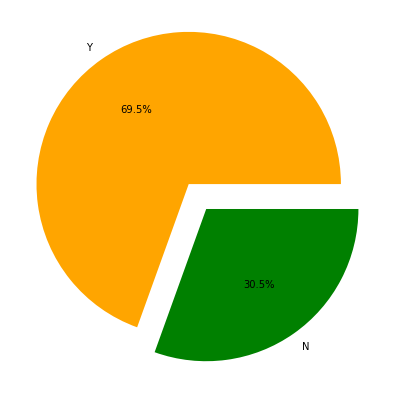

In [14]:
#univariate Analysis
data = df['Loan_Status'].value_counts()
plt.figure(figsize=(10,7))
plt.pie(data.values,labels=data.index,autopct='%1.1f%%',colors=('orange','green'),explode=(0.1,0.1))
plt.show()

We can see that the dataset is imbalanced. We have to balance it before trainig any model on this data.

In [ ]:
#We specify the DataFrame df as the data source for the sb.countplot() function. 
#The x parameter is set to the column name from which the count plot is to be created, 
#and hue is set to ‘Loan_Status’ to create count bars based on the ‘Loan_Status’ categories.

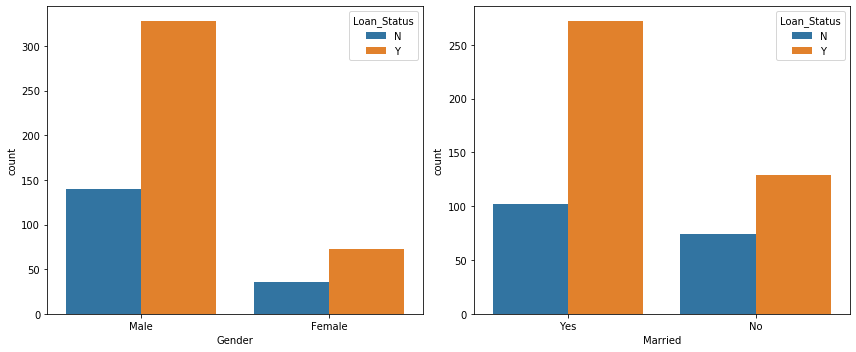

In [16]:
#Bivariate Analysis
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()


One of the main observations we can draw here is that the chances of getting a loan approved for married people are quite low compared to those who are not married.


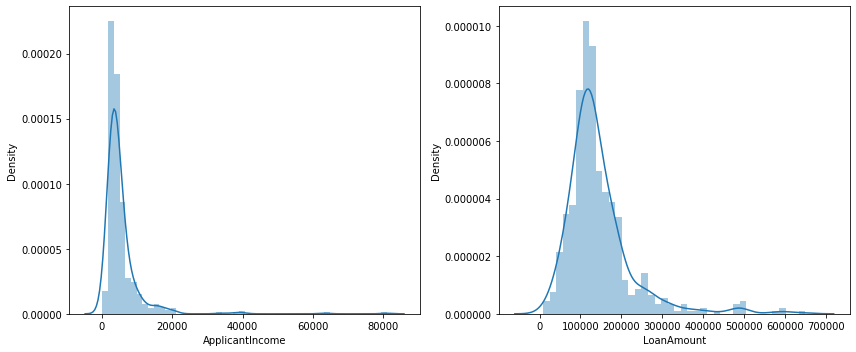

In [17]:
#ApplicantIncome v/s LoanAmount
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()


From the above figure we can say that the maximum applicant income lies 10000 to 20000. only few applicants have hiigher income. Also, the loan amount they are eligible is between 1lakh to 3lakhs. only few are eligible for more than 3 lacs.

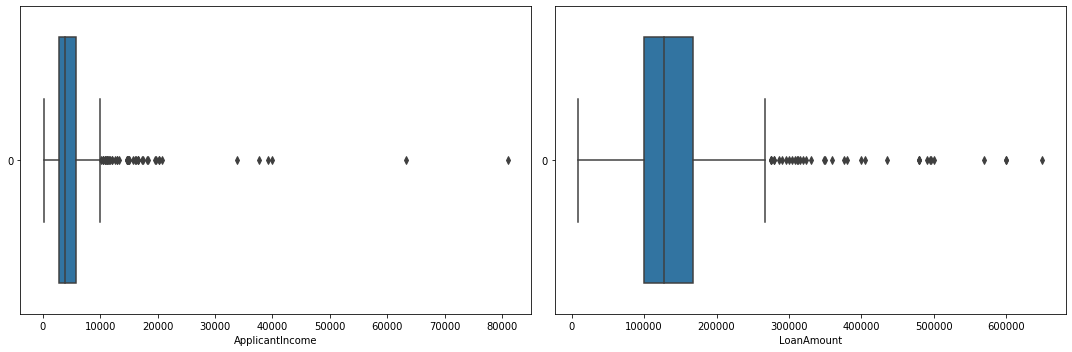

In [21]:
#To find put the utliers for the same columns that is ApplicantIncome v/s LoanAmount.We are creating the boxplot
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col],orient='horizontal')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


We can see that there are some outliers in the data. that we need to remove.We can see that there are outliers in the ApplicantIncome more than 30000. Also, there are outliers in the LoanAmount that is more than 4lacs. We nned to remove them.

In [22]:
#lets make changes
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]


Now let us check the mean amount of the loan granted to both male and female,i.e. Gender column. By using the groupby function and mean functions.

In [30]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female    118822.429907
Male      139289.823009
Name: LoanAmount, dtype: float64

From the above information we can say that the loan granted for males is higher than females.

In [32]:
#the same way let us check the mean amount of loan granted to both male and female as well as married or unmarried. 
df.groupby(['Married','Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116115.384615
         Male      126644.628099
Yes      Female    126103.448276
         Male      143912.386707
Name: LoanAmount, dtype: float64

Here is one more interesting observation in addition to the previous one that the married people requested loan amount is generally higher than that of the unmarried. This may be one of the reason’s that we observe earlier that the chances of getting loan approval for a married person are lower than that compared to an unmarried person.

In [33]:
#label Encoding
# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
 
    return data

In [34]:
#applying the label encoding function to the dataframe
df=encode_labels(df)

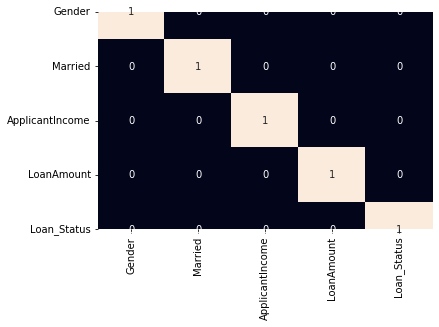

In [35]:
#Creating a Heatmap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

# Data Preprocessing

In [37]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status'].values

In [38]:
#Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
#We know that the data is hightly imbalanced. so, we will balance the data by adding repetitive rows and minority class

ros = RandomOverSampler(sampling_strategy='minority',random_state=0)

In [40]:
X,y = ros.fit_resample(X_train,y_train)

In [41]:
X_train.shape

(447, 4)

In [42]:
X.shape

(624, 4)

# Data Standarizing and Normalizing

In [43]:
#We will use Standard scaling to normalize the data.
#Normalizing the features for stable and fast training

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Model Building

In [45]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, y)
print('Training Accuracy : ', metrics.roc_auc_score(y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(y_test, model.predict(X_test)))
print()


Training Accuracy :  0.6009615384615384
Validation Accuracy :  0.538961038961039



In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#here we will calculate the ROC AUC score for both the training and testing datasets
train_roc_auc = roc_auc_score(y,model.predict(X))
test_roc_auc = roc_auc_score(y_test,model.predict(X_test))
print('Training ROC AUC Score:', train_roc_auc)
print("Testing ROC AUC Score:", test_roc_auc)
print()
cm = confusion_matrix(y_test,model.predict(X_test))

Training ROC AUC Score: 0.6009615384615384
Testing ROC AUC Score: 0.538961038961039



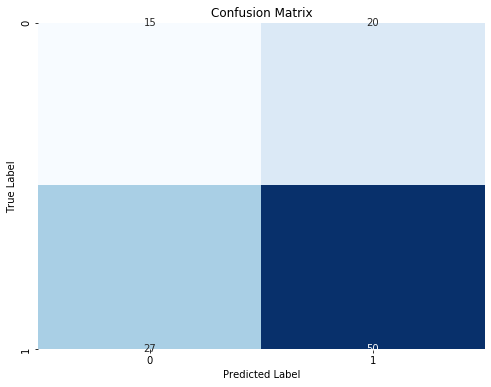

In [53]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.36      0.43      0.39        35
           1       0.71      0.65      0.68        77

    accuracy                           0.58       112
   macro avg       0.54      0.54      0.53       112
weighted avg       0.60      0.58      0.59       112



As this dataset contains fewer features the performance of the model is not up to the mark maybe if we will use a better and big dataset we will be able to achieve better accuracy. 